Initialize data set

In [1]:
import numpy as np

import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)
plt.style.use('fivethirtyeight')
import os # Used to interact with the file system
df = pd.read_csv('cardata.csv')
pd.DataFrame(df)
df.head
display(df.head(100))


,Make,Model,Series launch year,Trim / Version,Year start,Year end,Production start,Production end,New Price,Used price range,...,Child Occupant,Pedestrian,New Adult Occupant,New Child Occupant,New Vulnerable Road Users,New Safety Assist,Country,Status,Series (production years start-end),Image URL
0,BMW,3-Series,Saloon 2019 specs,318d MHT SE Pro 4dr Step Auto,2021,2022,Mar 2021,Mar 2022,"£36,985","£24,000 - £29,645",...,NaN,NaN,0.97,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...
1,BMW,3-Series,Saloon 2019 specs,318d SE Pro 4dr,2021,2022,Mar 2021,Mar 2022,"£35,435","£22,735 - £28,125",...,NaN,NaN,0.97,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...
2,BMW,3-Series,Saloon 2019 specs,320d MHT SE Pro 4dr Step Auto,2021,2022,Mar 2021,Mar 2022,"£38,535","£26,155 - £32,345",...,NaN,NaN,0.97,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...
3,BMW,3-Series,Saloon 2019 specs,320d xDrive MHT SE Pro 4dr Step Auto,2021,2022,Mar 2021,Mar 2022,"£40,085","£27,370 - £33,860",...,NaN,NaN,0.97,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...
4,BMW,3-Series,Saloon 2019 specs,318i SE Pro 4dr Step Auto,2021,2022,Mar 2021,Mar 2022,"£33,030","£23,580 - £29,135",...,NaN,NaN,0.97,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BMW,3-Series,Saloon 2019 specs,330i M Sport Automatic 4d,2019,2022,Jan 2019,Mar 2022,"£41,215","£23,535 - £37,575",...,NaN,NaN,0.97,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...
96,BMW,3-Series,Saloon 2019 specs,320i M Sport auto 4d,2019,2022,Mar 2019,Mar 2022,"£37,275","£21,580 - £34,425",...,NaN,NaN,0.97,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...
97,BMW,3-Series,Saloon 2019 specs,320i xDrive M Sport Automatic 4d,2019,2022,Jul 2019,Mar 2022,"£38,805","£22,690 - £35,435",...,NaN,NaN,0.97,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...
98,BMW,3-Series,Saloon 2019 specs,320i M Sport (Plus Package) Automatic 4d,2019,2020,Jul 2019,Aug 2020,"£38,185","£22,690 - £32,425",...,NaN,NaN,0.97,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...


as you can see, there are NaN values in certain rows as well as columns. we will convert these to 0 as to not alter the future calculations

In [2]:
df.fillna(0,inplace =True)
df.replace('N/a',0,inplace =True)
df.head()

,Make,Model,Series launch year,Trim / Version,Year start,Year end,Production start,Production end,New Price,Used price range,...,Child Occupant,Pedestrian,New Adult Occupant,New Child Occupant,New Vulnerable Road Users,New Safety Assist,Country,Status,Series (production years start-end),Image URL
0,BMW,3-Series,Saloon 2019 specs,318d MHT SE Pro 4dr Step Auto,2021,2022,Mar 2021,Mar 2022,"£36,985","£24,000 - £29,645",...,0,0,0.97,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...
1,BMW,3-Series,Saloon 2019 specs,318d SE Pro 4dr,2021,2022,Mar 2021,Mar 2022,"£35,435","£22,735 - £28,125",...,0,0,0.97,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...
2,BMW,3-Series,Saloon 2019 specs,320d MHT SE Pro 4dr Step Auto,2021,2022,Mar 2021,Mar 2022,"£38,535","£26,155 - £32,345",...,0,0,0.97,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...
3,BMW,3-Series,Saloon 2019 specs,320d xDrive MHT SE Pro 4dr Step Auto,2021,2022,Mar 2021,Mar 2022,"£40,085","£27,370 - £33,860",...,0,0,0.97,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...
4,BMW,3-Series,Saloon 2019 specs,318i SE Pro 4dr Step Auto,2021,2022,Mar 2021,Mar 2022,"£33,030","£23,580 - £29,135",...,0,0,0.97,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...


Lets do EDA on year, 

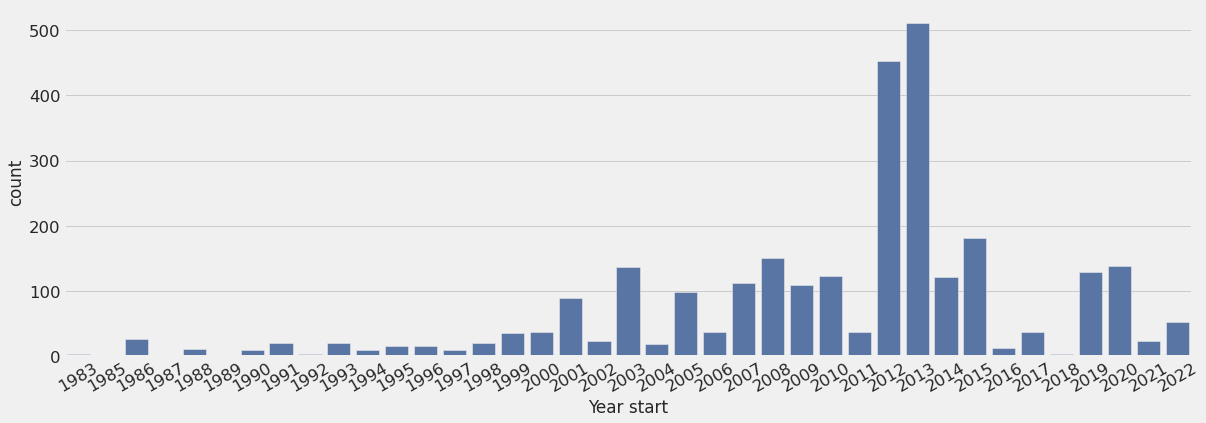

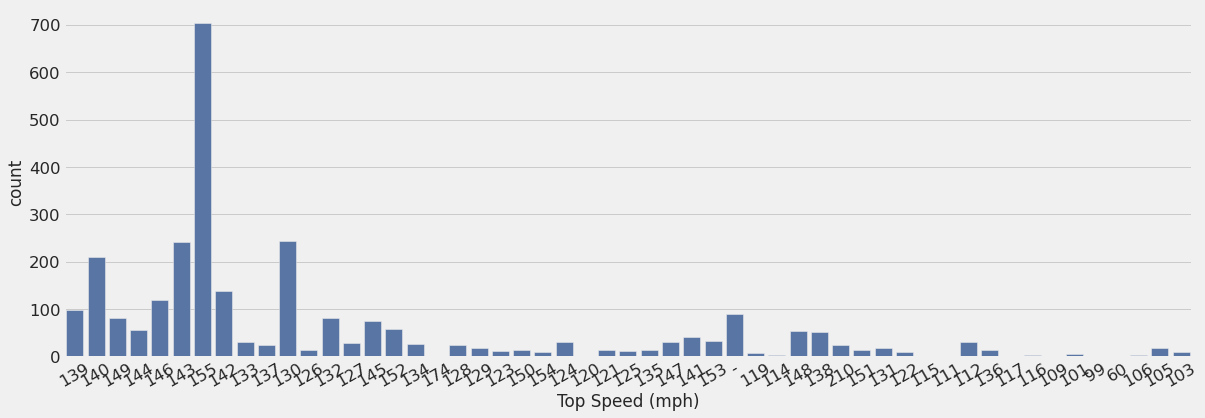

In [4]:
sns.set_color_codes()
fig, ax1 = plt.subplots(1,1, figsize = (18,6))
sns.countplot(x='Year start', data=df, color='b')
plt.xticks(rotation=30)
plt.draw()
sns.set_color_codes()
fig, ax1 = plt.subplots(1,1, figsize = 
                        (18,6))
sns.countplot(x='Top Speed (mph)', data=df, color='b')
plt.xticks(rotation=30)
plt.draw()

We can see on the table that fuel consumptuon and use price are in different ranges, for simplicity and use, we will convert each range value to the mean of the range below:

In [6]:

def convert_range_to_mean(df_column):
        # Remove the '$' and ',' characters from the input column
        
    df_column = df_column.str.replace('£', '').str.replace(',', '')
    
    # Split the input column into two parts based on the '-' character
    df_column = df_column.str.split('-', expand=True)
    
    # Convert the two parts into floats
    lower = df_column[0].astype(float)
    upper = df_column[1].astype(float)
    
    # Calculate the mean of the two parts
    mean = (lower + upper) / 2
    
    return mean

def convert_range_to_mean_mileage(df_column):
        # Remove the '$' and ',' characters from the input column
    mean_values = []
    
    for value in df_column:
        if isinstance(value, str):
            # If the value is a string, split it into two parts based on the '-' character
            value_parts = value.split('-')
            
            # Convert the two parts into floats
            lower = float(value_parts[0].strip().replace(' mpg', ''))
            if len(value_parts) > 1:
                upper = float(value_parts[1].strip().replace(' mpg', ''))
            else:
                upper = lower
            
            # Calculate the mean of the two parts
            mean_mpg = (lower + upper) / 2
            
            # Append the mean value to the list
            mean_values.append((mean_mpg))
        else:
            # If the value is not a string, assume it's a float and append it to the list followed by "mpg"
            mean_values.append((value))
    
    return pd.Series(mean_values)

print('before the functions: \n')
print(df['Fuel consumption (mpg)'])
print('\n')
print(df['Used price range'])
df['Fuel consumption (mpg)'] = convert_range_to_mean_mileage(df['Fuel consumption (mpg)'])
df['Used price range'] = convert_range_to_mean(df['Used price range'])
print('after the functions: \n')
print(df['Fuel consumption (mpg)'])
print('\n')
print(df['Used price range'])



before the functions: 

0       61.45
1       57.70
2       60.75
3       56.50
4       43.80
        ...  
2845     0.00
2846     0.00
2847     0.00
2848     0.00
2849    47.10
Name: Fuel consumption (mpg), Length: 2850, dtype: float64


0       26822.5
1       25430.0
2       29250.0
3       30615.0
4       26357.5
         ...   
2845    16970.0
2846    15892.5
2847    21165.0
2848    21607.5
2849    26877.5
Name: Used price range, Length: 2850, dtype: float64


AttributeError: Can only use .str accessor with string values!

We can also see that the column, New Price is in a string format with the british pound symbol, remove the symbol and make it a float for data processing

In [13]:
def currency_to_float(s):
    return float(s.replace('£', '').replace(',',''))

# apply function to 'price' column
df['New Price'] = df['New Price'].apply(currency_to_float)


AttributeError: 'float' object has no attribute 'replace'

Now that we have values to work with let us continue EDA 

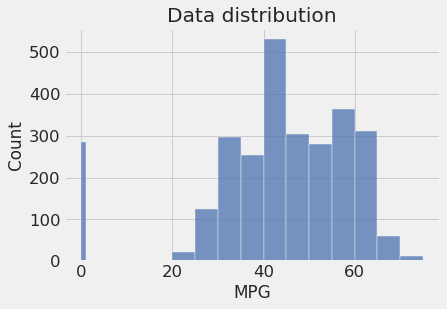

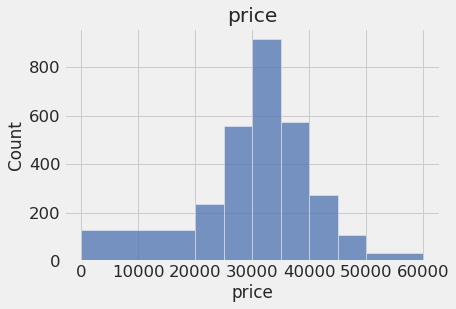

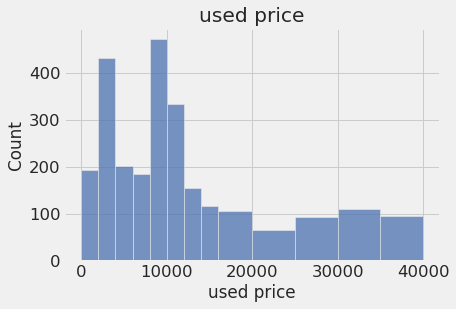

In [28]:
bin_range = [0,1,2,3,4,5,6,7,10,15,20,25,30,35,40,45,50,55,60,65,70,75]

# Create the histogram using sns.histplot()
sns.histplot(data=df, x='Fuel consumption (mpg)', bins=bin_range)
# Add axis labels and a title
plt.xlabel('MPG')
plt.ylabel('Count')
plt.title('Data distribution')

# Display the plot
plt.show()

bin_range = [0,20000,25000,30000,35000,40000,45000,50000,60000]

# Create the histogram using sns.histplot()

sns.histplot(data=df, x='New Price', bins=bin_range)
# Add axis labels and a title
plt.xlabel('price')
plt.ylabel('Count')
plt.title('price')



# display the plot
plt.show()

bin_range = [0,2000,4000,6000,8000,10000,12000,14000,16000,20000,25000,30000,35000,40000]

# Create the histogram using sns.histplot()

sns.histplot(data=df, x='Used price range', bins=bin_range)
# Add axis labels and a title
plt.xlabel('used price')
plt.ylabel('Count')
plt.title('used price')

# Display the plot
plt.show()
